## Carga dos dados

In [2]:
import pandas as pd 
horas = pd.read_csv('hour.csv')
horas.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Análise Exploratória

In [3]:
print('Dimensões dos dataset horas: ', horas.shape)
horas.describe()

Dimensões dos dataset horas:  (17379, 17)


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
horas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# Verifica se existem valores Null
horas.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Treinamento e Teste do Modelo

In [6]:
del horas['dteday']
X = horas.drop('cnt', axis=1).values
y = horas['cnt'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [8]:
print('X_train shape', X_train.shape)
print('X_test shape', X_train.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (13903, 15)
X_test shape (13903, 15)
y_train shape (13903,)
y_test shape (3476,)


## Base de comparação

In [9]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


colunas = list(horas.columns)
y_hist = X_test[:, colunas.index('registered')]
print('MAE :', mean_absolute_error(y_test, y_hist))
print('MSE :', mean_squared_error(y_test, y_hist))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_hist)))

MAE : 34.3716915995397
MSE : 3479.2272727272725
RMSE: 58.984974974371845


## Importância das variáveis independentes

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
importancias = list(rf.feature_importances_)
variaveis_importancias = [(coluna, importancia) for coluna, importancia in zip(colunas, importancias)]
variaveis_importancias = sorted(variaveis_importancias, key=lambda x:x[1], reverse=True)
for v, i in variaveis_importancias:
    print(f'Variavel: {v:10} - Importancia: {i}')

Variavel: registered - Importancia: 0.9487116973477973
Variavel: casual     - Importancia: 0.05100941637577871
Variavel: instant    - Importancia: 4.8138906944280086e-05
Variavel: hum        - Importancia: 4.155145891848923e-05
Variavel: windspeed  - Importancia: 3.475454437841304e-05
Variavel: hr         - Importancia: 2.8932777652139843e-05
Variavel: atemp      - Importancia: 2.6446910854369455e-05
Variavel: temp       - Importancia: 2.5658040020127163e-05
Variavel: mnth       - Importancia: 1.989282587960202e-05
Variavel: weekday    - Importancia: 1.8384131610012008e-05
Variavel: yr         - Importancia: 1.0165148581910263e-05
Variavel: workingday - Importancia: 8.814592267568613e-06
Variavel: season     - Importancia: 7.691156688773143e-06
Variavel: weathersit - Importancia: 6.889709234071722e-06
Variavel: holiday    - Importancia: 1.566073394249143e-06


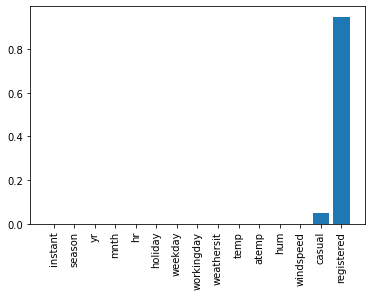

In [12]:
import matplotlib.pyplot as plt
X_valores = list(range(len(importancias)))
_=plt.bar(X_valores, importancias)
colunas = colunas[:-1]
_=plt.xticks(X_valores, colunas, rotation='vertical')

## Variaveis mais importantes

In [13]:
rf_imp = RandomForestRegressor(n_estimators=100, random_state=42)
indices = [colunas.index('casual'), colunas.index('registered')]
X_train_imp = X_train[:, indices]
X_test_imp = X_test[:, indices]
rf_imp.fit(X_train_imp, y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred = rf_imp.predict(X_test_imp)
print('MAE :', mean_absolute_error(y_test, y_pred))
print('MSE :', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 0.655135212888378
MSE : 5.044736737629457
RMSE: 2.2460491396292865


## Avaliação de outros modelos

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
RANDOM_STATE = 42

def build_regressors():
    regressors = []

    regressors.append(
        ('lr', 
        LinearRegression(),
        {'fit_intercept': [True, False]})
    )

    regressors.append(
        ('svr',
        LinearSVR(),
        {'C': [0.1, 1],
         'epsilon': [0.2, 0.3]})
    )

    return regressors

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

train_results = []
test_results = []
names = []

scoring = 'neg_root_mean_squared_error'

regressors = build_regressors()
kfold = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

for name, regressor, params in regressors:
    print(f">>> pregressor : {name}")

    # Treinamento
    gs = GridSearchCV(regressor, param_grid=params, scoring=scoring, verbose=1)
    gs.fit(X_train, y_train)
    cv_results = cross_val_score(gs, X_train, y_train, cv=kfold, scoring=scoring) # análise
    names.append(name)
    train_results.append(abs(cv_results))

    # Teste
    y_pred = gs.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    test_results.append(rmse)

>>> pregressor : lr
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
>>> pregressor : svr
Fitting 5 folds for each of 4 candidates, totalling 20 fits
C:\Python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Python38\lib\site-packages\sklearn\svm\_base.py:985: Conver

Text(0.5, 0, 'Regressores')

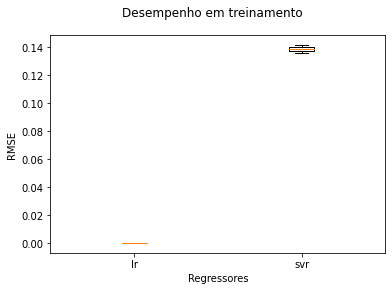

In [17]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho em treinamento')
_ = plt.boxplot(train_results)
ax.set_xticklabels(names)
ax.set_ylabel('RMSE')
ax.set_xlabel('Regressores')

Text(0.5, 0, 'Regressores')

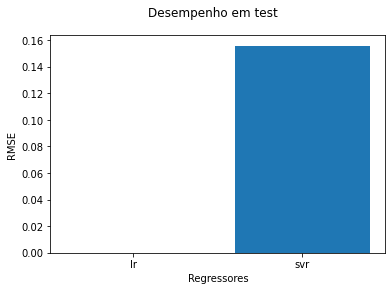

In [18]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho em test')
_ = plt.bar(names, test_results)
ax.set_ylabel('RMSE')
ax.set_xlabel('Regressores')

## Conclusão

O algoritmo SVR demonstrou escalar mal com um número maior de amostras, então ele foi substituido pelo LinearSVR, 
que acabou demonstrando um RMSE superior ao outro algoritmo comparado, o Lr.